# Alzheimer’s Disease and Cognitive Impairment Prediction
**ELIUD OMOLLO**<br/>

In [1]:
#numpy and pandas
import pandas as pd
import numpy as np

In [2]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [4]:
#Regressions
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [5]:
#classification
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline

In [6]:
#Regression model metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [7]:
#classification metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [8]:
#regularization 
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.decomposition import PCA

In [9]:
#cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [10]:
#utilities
from sklearn.model_selection import train_test_split

In [11]:
#global random state
rnd_state = 41

In [12]:
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

In [13]:
#import ADNIMERGE
adnimergeDF= pd.read_csv('data\ADNIMERGE.csv')[['RID','DX']]
#import Medical History
medHistDF_r = pd.read_csv('data\MEDHIST.csv', low_memory=False)
medHistDF = medHistDF_r.iloc[: , np.r_[2, 10:37]]

In [14]:
#Merge all the data into one dataframe
data = pd.merge(adnimergeDF, medHistDF, on='RID', how='inner')
data = data.drop('RID', axis=1)
data.shape

(21050, 28)

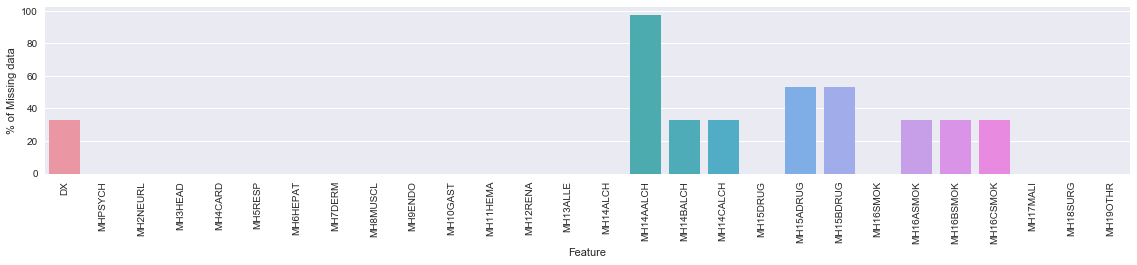

In [15]:
miss_data = {col: (pd.isnull(data[col]).sum()/data.shape[0])*100 for col in list(data) }
miss_data_df = pd.DataFrame.from_dict(data=miss_data, orient='index')
g = sns.factorplot(x=miss_data_df.index , y=0, data=miss_data_df, kind= 'bar', aspect=4)
g.set_xticklabels(rotation=90, fontsize=10)
g.set_xlabels('Feature')
g.set_ylabels('% of Missing data')
plt.show()

In [16]:
for col in list(data):
    miss = (pd.isnull(data[col]).sum()/data.shape[0])*100
    if miss > 0:
        print('{} : {} % Missing'.format(col, miss))

DX : 32.68408551068884 % Missing
MH14AALCH : 97.64845605700712 % Missing
MH14BALCH : 33.04038004750594 % Missing
MH14CALCH : 33.04038004750594 % Missing
MH15ADRUG : 52.99287410926365 % Missing
MH15BDRUG : 52.99287410926365 % Missing
MH16ASMOK : 33.04038004750594 % Missing
MH16BSMOK : 33.04038004750594 % Missing
MH16CSMOK : 33.04038004750594 % Missing


In [17]:
#Drop null columns. These columns are related to alcohol consumption, drug use and smoking
data = data.drop(['MH14AALCH','MH14BALCH','MH14CALCH', 'MH15ADRUG','MH15BDRUG', 'MH16ASMOK', 'MH16BSMOK', 'MH16CSMOK' ], axis=1)
data = data.dropna(axis=0, how='any')

In [18]:
data.shape

(14170, 20)

**Exploratory data analysis**<br/>

In [19]:
#encode the labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['DX_'] = le.fit_transform(data['DX'])
print(le.inverse_transform([0, 1, 2]))
data = data.drop('DX', axis=1)

['CN' 'Dementia' 'MCI']


In [20]:
#Split the data into  75% train and 25% test splits
train, test = train_test_split(data, test_size=0.25, random_state=rnd_state)

In [21]:
#Initial Analysis
print('Shape ', train.shape)

Shape  (10627, 20)


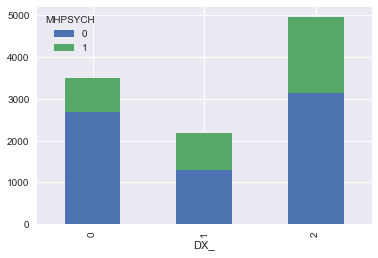

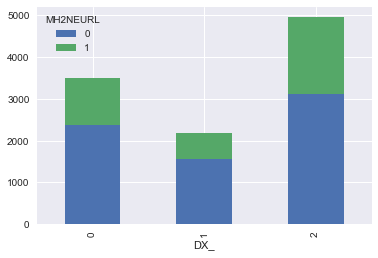

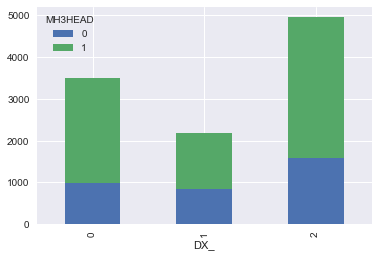

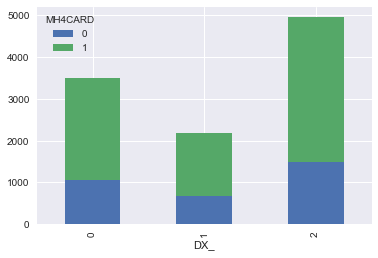

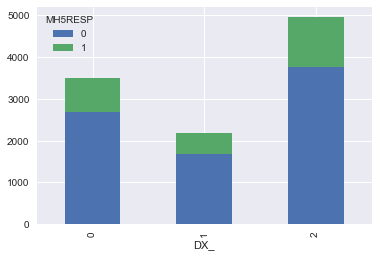

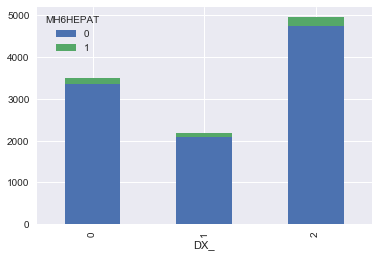

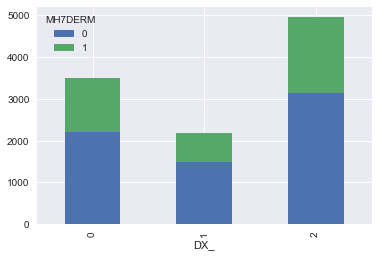

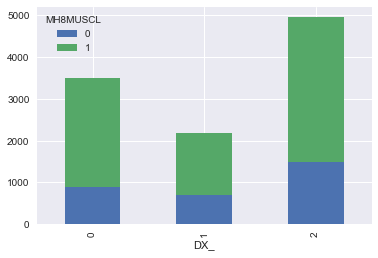

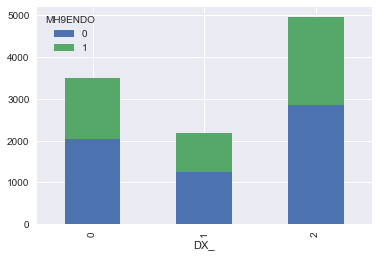

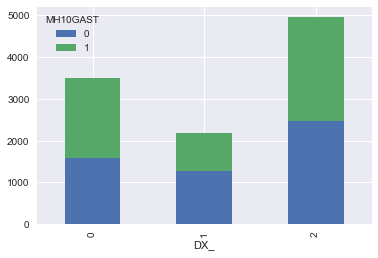

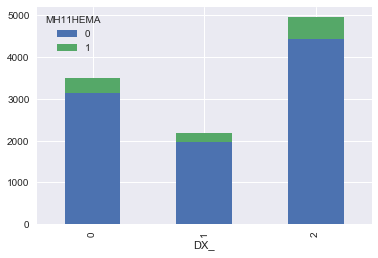

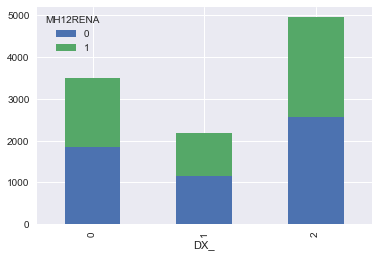

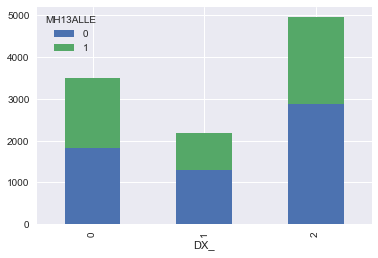

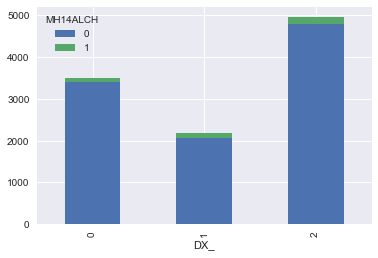

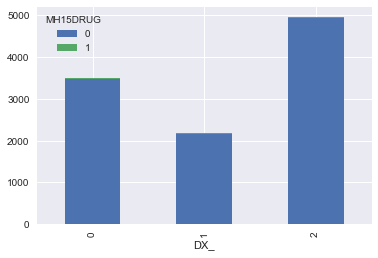

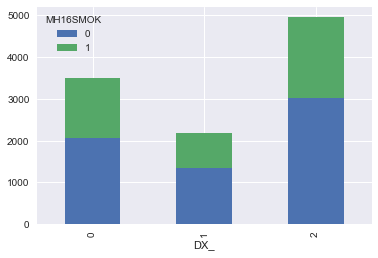

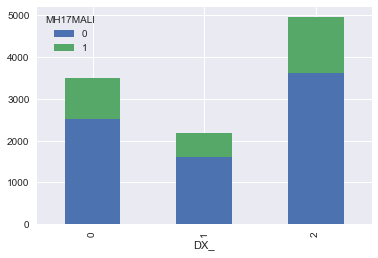

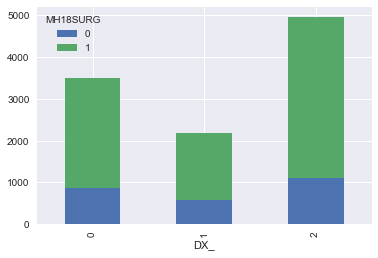

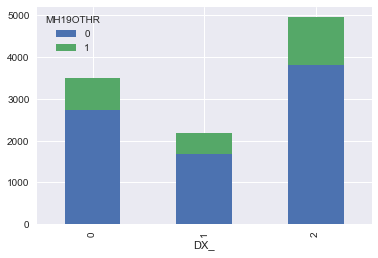

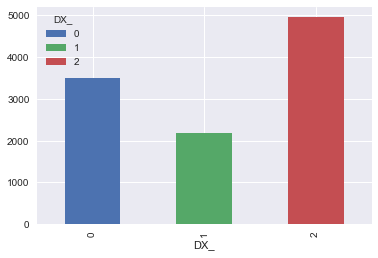

In [58]:
for col in list(train):
    train.groupby(['DX_', col]).size().unstack().plot(kind = 'bar', stacked=True)

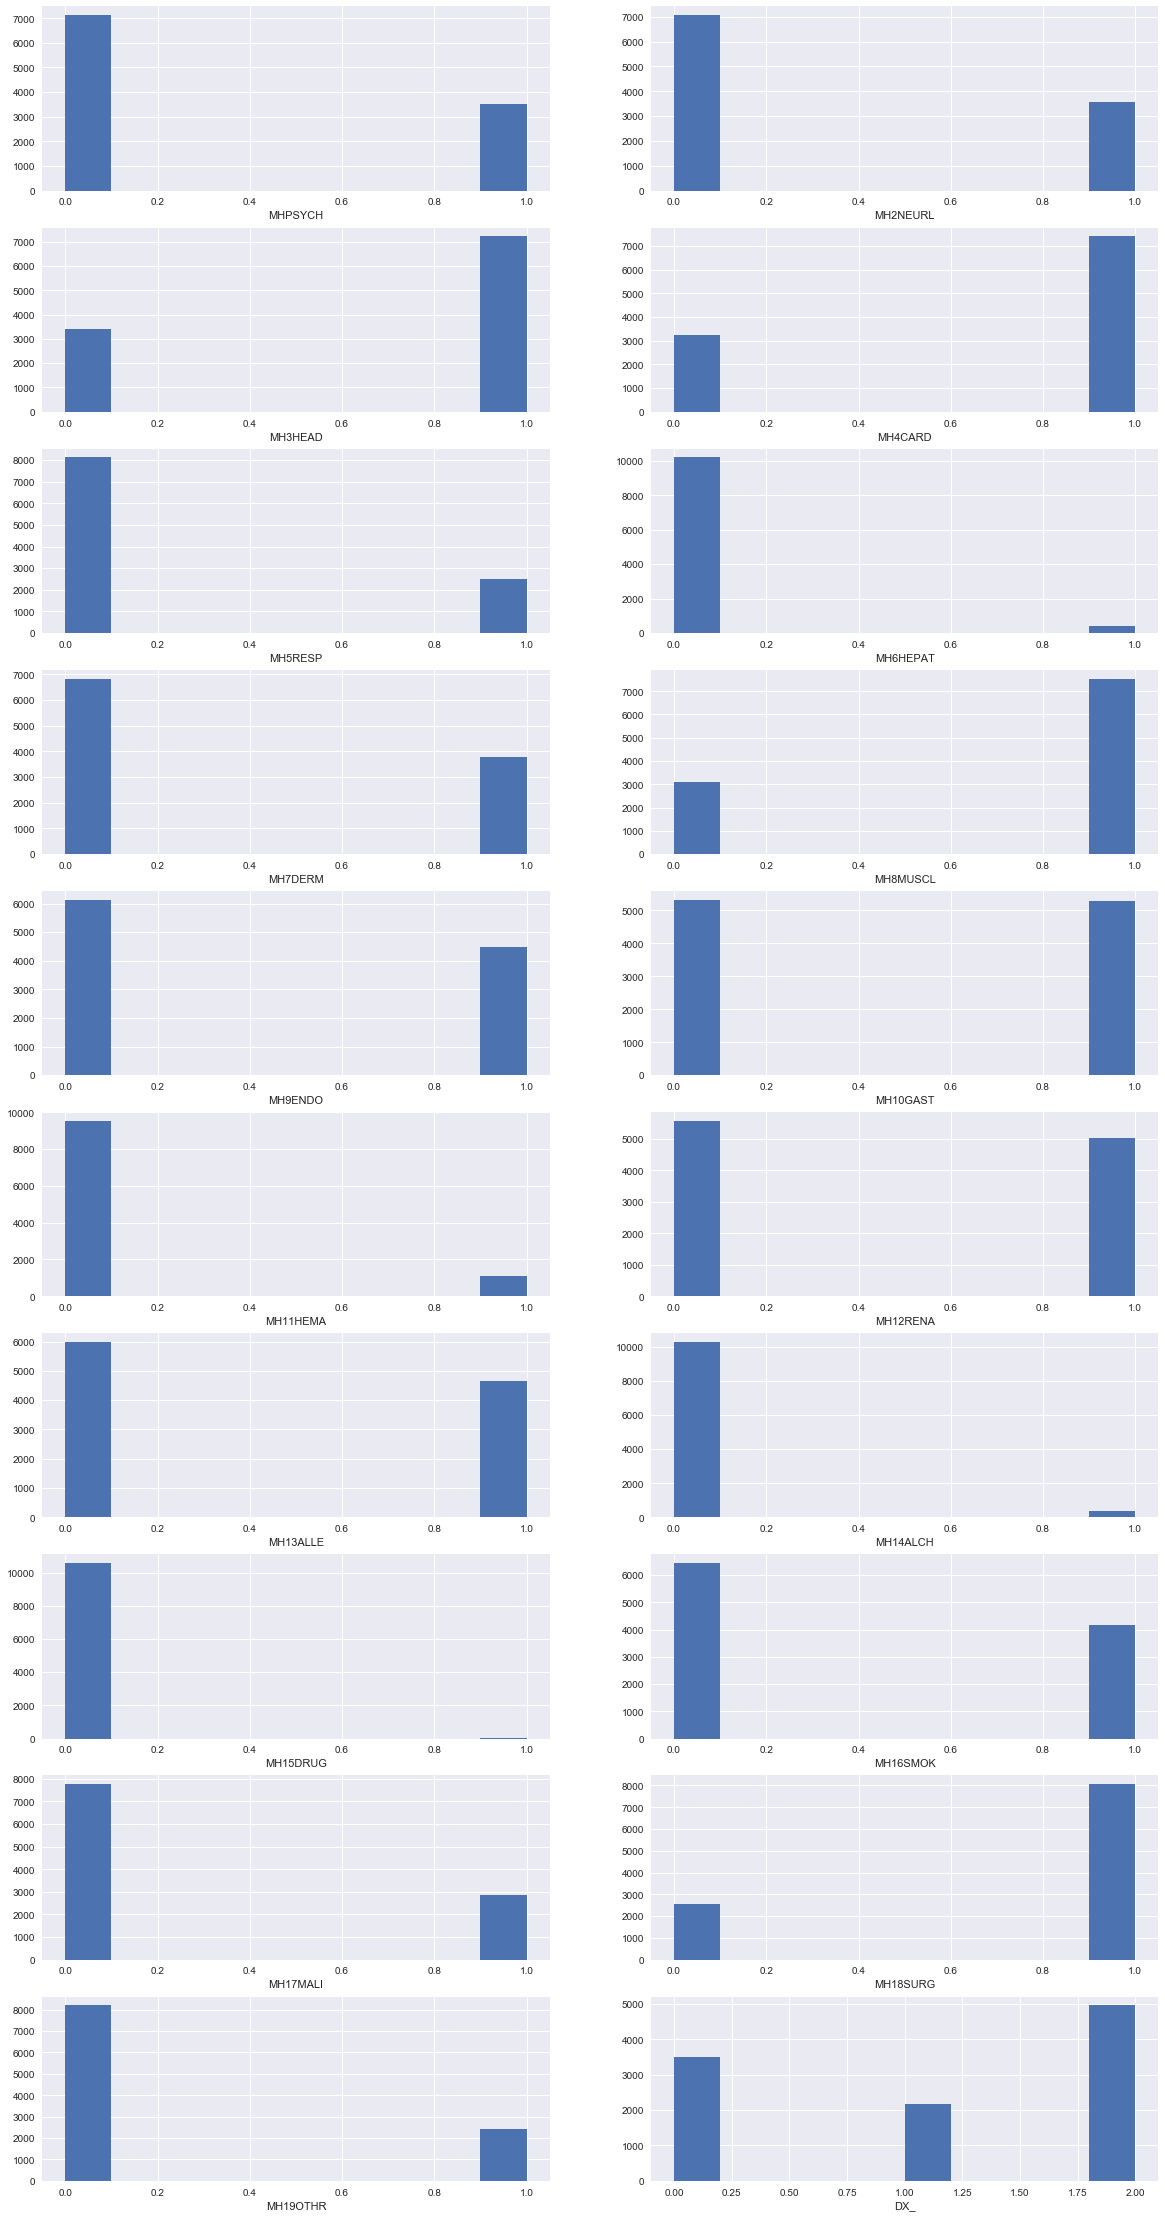

In [22]:
plt.figure(figsize=(20, 40))
for k, p in enumerate(train.columns):
    plt.subplot(10,2, k+1)    
    train[p].hist()
    plt.xlabel(p)
plt.show()

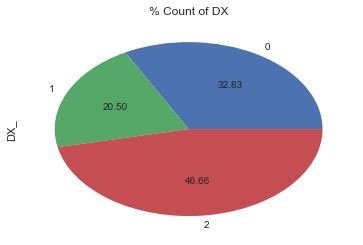

In [33]:
train['DX_'].value_counts(sort=False).plot.pie(autopct='%.2f').set_title('% Count of DX')

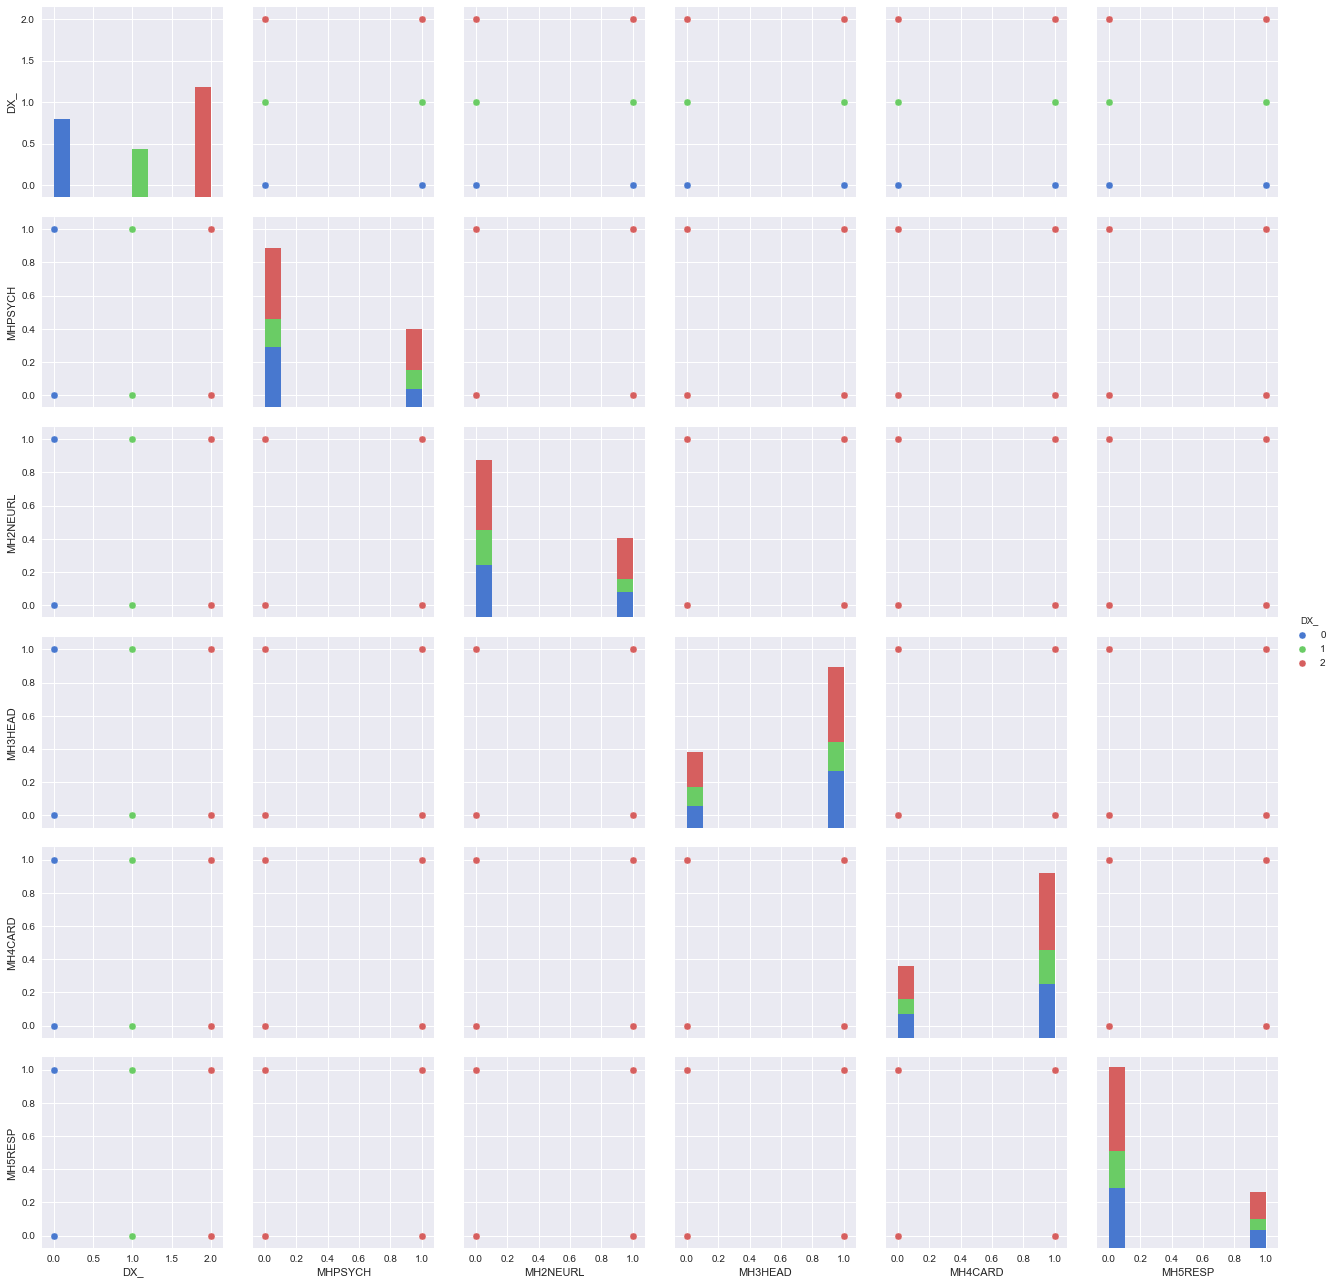

In [24]:
g = sns.pairplot(train.iloc[:, np.r_[19, 0:5]], hue='DX_',palette='muted',size=3)

**Predictions**<br/>

In [26]:
#identify the target variable
X_train = train.drop('DX_', axis=1)
y_train = train['DX_']
X_test = test.drop('DX_', axis=1)
y_test = test['DX_']

In [27]:
X_train.shape

(10627, 19)

In [28]:
#Baseline Model: LogisticRegression with Cross Validation
#This is the model that we will ue for comparison

lgr= LogisticRegressionCV(Cs=10, random_state=rnd_state, penalty='l2', cv = 5, multi_class='multinomial')
lgr.fit(X_train, y_train)
print('LogisticRegression Train Score', lgr.score(X_train, y_train))
print('LogisticRegression Test Score', lgr.score(X_test, y_test))

LogisticRegression Train Score 0.465982873812
LogisticRegression Test Score 0.459779847587


In [213]:
#Confusion Matrix and Classfication Report
print('Confusion Matrix:\n', confusion_matrix(y_test,lgr.predict(X_test)))
print('Classificaton Report: \n', classification_report(y_test,lgr.predict(X_test)))

Confusion Matrix:
 [[ 268    0  887]
 [  95    3  636]
 [ 295    1 1358]]
Classificaton Report: 
              precision    recall  f1-score   support

          0       0.41      0.23      0.30      1155
          1       0.75      0.00      0.01       734
          2       0.47      0.82      0.60      1654

avg / total       0.51      0.46      0.38      3543



In [ ]:
#Confusion Matrix:
#Precision: When it predicts yes, how often is it correct?
#Recall: When it's actually yes, how often does it predict yes?

In [214]:
scoring = ['accuracy','neg_log_loss']
kfold = KFold(n_splits=10, random_state=rnd_state)
for score in scoring:
    cvScores = cross_val_score(lgr, X_test, y_test, cv=kfold, scoring=score).mean()
    print('{}: {}'.format(score, cvScores))

accuracy: 0.4668536643590356
neg_log_loss: -1.0464935298116862


In [232]:
pipe= Pipeline([('clr', RandomForestClassifier()),])
params= [
       
         #RandomForestClassifier Parameter Tuning    
        {       
                   
        'clr': (RandomForestClassifier(random_state= rnd_state, n_jobs = -1),),
        'clr__n_estimators' : (10, 20), 
        'clr__max_features': ('sqrt', None),        
                
        },
        {
            #Linear Discriminant Analysis          
                     
        'clr': (LinearDiscriminantAnalysis(), )     
        },
        {
            #- Quadratic Discriminant Analysis
                
            'clr': (QuadraticDiscriminantAnalysis(),)        
        },
        
      
        {
            #- KNeighborsClassifier Parameter Tuning
                
        'clr': (KNeighborsClassifier(),), 
        'clr__n_neighbors': (2, 5, 10, 20),
        }
        ]
gsearch = GridSearchCV(pipe, param_grid= params, cv=5)
gsearch.fit(X_train, y_train)
print('Train Score: ', gsearch.score(X_train, y_train))
print('Test Score: ', gsearch.score(X_test, y_test))

Train Score:  0.826856121201
Test Score:  0.76883996613


In [216]:
gsearch.best_params_

{'clr': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=20, n_jobs=-1, oob_score=False, random_state=41,
             verbose=0, warm_start=False),
 'clr__max_features': None,
 'clr__n_estimators': 20}

In [217]:
#Confusion Matrix and Classfication Report
print('Confusion Matrix:\n', confusion_matrix(y_test,gsearch.predict(X_test)))
print('Classificaton Report: \n', classification_report(y_test,gsearch.predict(X_test)))

Confusion Matrix:
 [[ 981   32  142]
 [  63  417  254]
 [ 151  177 1326]]
Classificaton Report: 
              precision    recall  f1-score   support

          0       0.82      0.85      0.83      1155
          1       0.67      0.57      0.61       734
          2       0.77      0.80      0.79      1654

avg / total       0.77      0.77      0.77      3543

